In [1]:
# Cell 1: Kaggle API Setup
import os
import json

# This project designed for "https://www.kaggle.com/datasets/alessiocorrado99/animals10/data"
# Users need to insert their KAGGLE_USERNAME AND KAGGLE_KEY below this comment
# ---------------------------------------------------------------
KAGGLE_USERNAME = "*****"
KAGGLE_KEY = "***************"
# ---------------------------------------------------------------

kaggle_dir = os.path.expanduser("~/.kaggle")
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
if not os.path.exists(kaggle_json_path) :
    kaggle_credentials = {"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}
    with open(kaggle_json_path, "w") as f:
        json.dump(kaggle_credentials, f)
    os.chmod(kaggle_json_path, 0o600)
    print("Kaggle API token configured/updated directly from script.")
else:
    print("Kaggle API token already configured.")

Kaggle API token configured/updated directly from script.


In [2]:
# Cell 2: Download Dataset and Auto-Detect DATA_DIR
import os
import shutil


BASE_DOWNLOAD_PATH = "/content/datasets"
DATASET_NAME = "animals10"
FULL_DATASET_PATH = os.path.join(BASE_DOWNLOAD_PATH, DATASET_NAME)


KNOWN_CLASSES_SAMPLE = ["dog", "cat", "spider", "elephant", "raw-img"]

DATA_DIR = None


if not os.path.exists(FULL_DATASET_PATH) or not any(kc in " ".join(os.listdir(FULL_DATASET_PATH)) for kc in KNOWN_CLASSES_SAMPLE if os.path.exists(FULL_DATASET_PATH)):
    print(f"Downloading and unzipping animals-10 dataset to {FULL_DATASET_PATH}...")
    !kaggle datasets download -d alessiocorrado99/animals10 -p {FULL_DATASET_PATH} --unzip
    print("Dataset download and unzip complete.")
else:
    print(f"Dataset likely already exists at {FULL_DATASET_PATH}. Skipping download.")


print(f"\nAttempting to locate the image class folders within: {FULL_DATASET_PATH}")

possible_data_dirs = []

possible_data_dirs.append(os.path.join(FULL_DATASET_PATH, "raw-img"))

possible_data_dirs.append(os.path.join(FULL_DATASET_PATH, "animals-10", "raw-img"))

possible_data_dirs.append(os.path.join(FULL_DATASET_PATH, "animals10", "raw-img"))

possible_data_dirs.append(FULL_DATASET_PATH)

possible_data_dirs.append(os.path.join(FULL_DATASET_PATH, "alessiocorrado99-animals10", "raw-img"))



for root, dirs, files in os.walk(FULL_DATASET_PATH):

    actual_class_folders_sample = ["cane", "gatto", "elefante", "ragno"] # Using Italian names as per Kaggle page

    if dirs:
        found_classes = [d for d in dirs if d in actual_class_folders_sample]
        if len(found_classes) >= 2:
            if root not in possible_data_dirs:
                 possible_data_dirs.append(root)
            print(f"  Found potential directory with class folders: {root}")


print("\nChecking potential DATA_DIR paths:")
for potential_dir in possible_data_dirs:
    if os.path.isdir(potential_dir):

        dir_contents = os.listdir(potential_dir)

        if any(cls_name in dir_contents for cls_name in actual_class_folders_sample):

            is_valid_structure = True
            for cls_name_check in actual_class_folders_sample:
                if cls_name_check in dir_contents and not os.path.isdir(os.path.join(potential_dir, cls_name_check)):
                    is_valid_structure = False
                    break
            if is_valid_structure and any(os.path.isdir(os.path.join(potential_dir, cls_name_check)) for cls_name_check in actual_class_folders_sample if cls_name_check in dir_contents) :
                DATA_DIR = potential_dir
                print(f"  SUCCESS: Found valid DATA_DIR: {DATA_DIR}")
                print(f"  Contents (first few): {os.listdir(DATA_DIR)[:5]}")
                break
        else:
            print(f"  Skipping (not enough class folders or not a dir): {potential_dir}")
    else:
        print(f"  Skipping (does not exist or not a dir): {potential_dir}")

if DATA_DIR is None:
    print("\nERROR: Could not automatically determine DATA_DIR.")
    print(f"Please manually inspect the contents of '{FULL_DATASET_PATH}' (and its subdirectories) using the Colab file browser,")
    print("then set the DATA_DIR variable in the next cell to the path that contains the individual animal class folders (e.g., 'cane', 'gatto', 'elefante', etc.).")
    print("\nDirectory listing of the download path:")
    print(f"Contents of {BASE_DOWNLOAD_PATH}:")
    if os.path.exists(BASE_DOWNLOAD_PATH):
        for item in os.listdir(BASE_DOWNLOAD_PATH):
            print(f"  - {item}")
            item_path = os.path.join(BASE_DOWNLOAD_PATH, item)
            if os.path.isdir(item_path) and item == DATASET_NAME:
                 print(f"    Contents of {item_path}:")
                 for sub_item in os.listdir(item_path):
                     print(f"      - {sub_item}")
                     sub_item_path = os.path.join(item_path, sub_item)
                     if os.path.isdir(sub_item_path):
                        print(f"        Contents of {sub_item_path}:")
                        for sub_sub_item in os.listdir(sub_item_path):
                            print(f"          - {sub_sub_item}")

else:
    print(f"\nFinal DATA_DIR set to: {DATA_DIR}")

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 581M/586M [00:07<00:00, 132MB/s]
100% 586M/586M [00:07<00:00, 84.9MB/s]
Dataset download and unzip complete.

Attempting to locate the image class folders within: /content/datasets/animals10
  Found potential directory with class folders: /content/datasets/animals10/raw-img

Checking potential DATA_DIR paths:
  SUCCESS: Found valid DATA_DIR: /content/datasets/animals10/raw-img
  Contents (first few): ['scoiattolo', 'gatto', 'mucca', 'cavallo', 'pecora']

Final DATA_DIR set to: /content/datasets/animals10/raw-img


Cell 3 starting. DATA_DIR from previous cell is: /content/datasets/animals10/raw-img
Attempting to load dataset from: /content/datasets/animals10/raw-img
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.

Class names found by Keras: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of classes found: 10

Defining data augmentation pipeline...
Data augmentation pipeline defined.
Applying data augmentation to the training dataset...
Configuring training dataset for performance with SHUFFLE_BUFFER_SIZE = 20944...
Configuring validation dataset for performance...
Datasets configured successfully.

Defining CNN model architecture (L2 kernel regularizers removed for AdamW)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 128, 128, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 32, 32, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             

 Total params: 130,762 (510.79 KB)

 Trainable params: 129,802 (507.04 KB)

 Non-trainable params: 960 (3.75 KB)

Model architecture defined.

Compiling model with AdamW optimizer...
Model compiled with AdamW.

Starting model training (AdamW, NO class weights)...
Epoch 1/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.1890 - loss: 2.4962 - val_accuracy: 0.3114 - val_loss: 1.9462 - learning_rate: 5.0000e-04
Epoch 2/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.2898 - loss: 2.0444 - val_accuracy: 0.3786 - val_loss: 1.7571 - learning_rate: 5.0000e-04
Epoch 3/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3436 - loss: 1.8730 - val_accuracy: 0.4151 - val_loss: 1.6934 - learning_rate: 5.0000e-04
Epoch 4/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3630 - loss: 1.8136 - val_accuracy: 0.4210 - val_loss: 1.6594 - learning_rate: 5.0000e-04
Epoch 5/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3848 - loss: 1.7257 - val_accuracy: 0.3971 - val_loss: 1.7386 - learning_rate: 5.0000e-04
Epoch 6/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accu

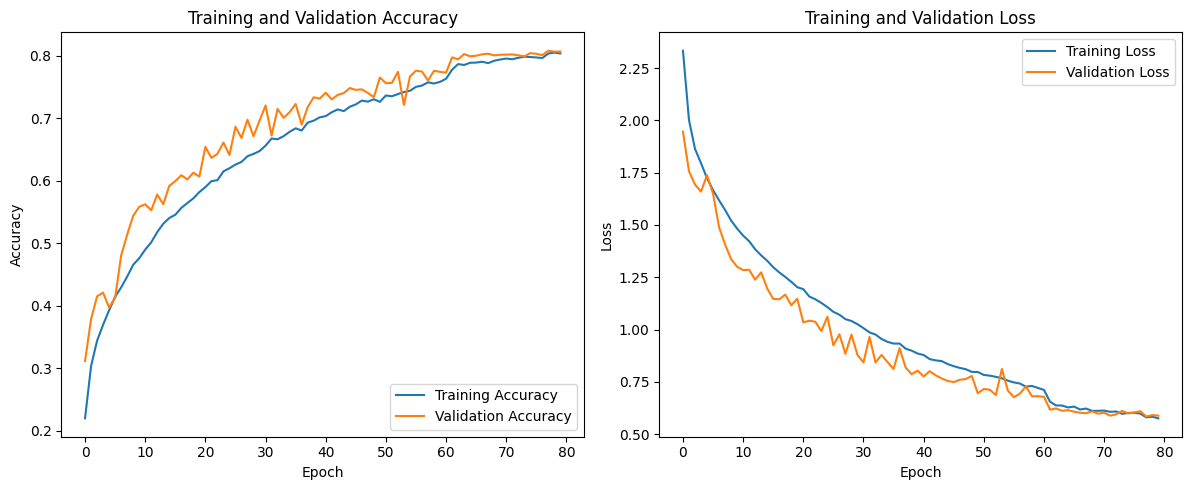


--- Predictions for 3 Sample Validation Images ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


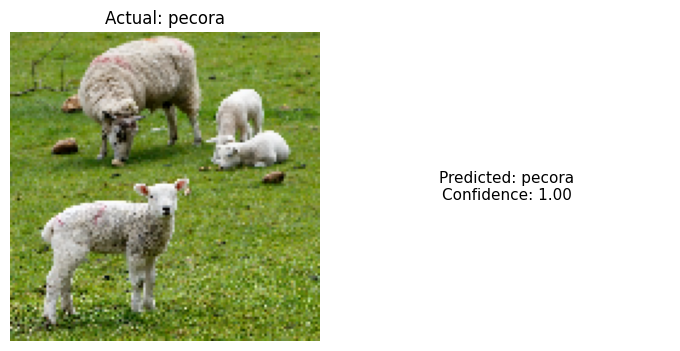

Sample 1: Actual: pecora, Predicted: pecora, Confidence: 0.9998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


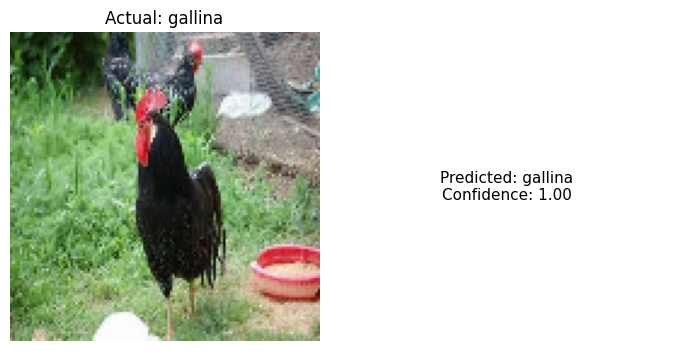

Sample 2: Actual: gallina, Predicted: gallina, Confidence: 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


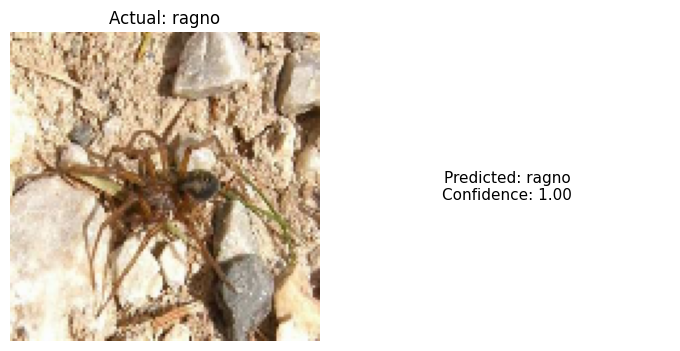

Sample 3: Actual: ragno, Predicted: ragno, Confidence: 0.9995


In [ ]:
# Cell 3: Custom CNN (Imports, Parameters, Model Definition, Training, Evaluation)

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import traceback

print(f"Cell 3 starting. DATA_DIR from previous cell is: {DATA_DIR if 'DATA_DIR' in locals() else 'Not Defined'}")

# --- 1. Dataset Preparation -----------------------------------------------------------------------------------------------
try:
    if 'DATA_DIR' not in locals() or DATA_DIR is None:
        print("CRITICAL ERROR: 'DATA_DIR' is not defined or is None. It should have been set by Cell 2.")
        raise NameError("DATA_DIR not set")

    if not os.path.exists(DATA_DIR):
        print(f"CRITICAL ERROR: The DATA_DIR '{DATA_DIR}' does not exist. Please check the path set in Cell 2 or manually.")
        raise FileNotFoundError(f"DATA_DIR not found: {DATA_DIR}")

    # Image and Training Parameters
    IMG_WIDTH = 128
    IMG_HEIGHT = 128
    IMAGE_SIZE = (IMG_HEIGHT, IMG_WIDTH)
    BATCH_SIZE = 32
    AUTOTUNE = tf.data.AUTOTUNE
    N_CLASSES = 10 # Default for animals-10
    EPOCHS = 80 # Might not reach all epochs if early stopping or LR plateau triggers significant changes
    SHUFFLE_BUFFER_SIZE = 20944

    print(f"Attempting to load dataset from: {DATA_DIR}")
    # Load initial training data
    train_dataset_raw = image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical'
    )

    validation_dataset = image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical'
    )

    class_names = train_dataset_raw.class_names
    print(f"\nClass names found by Keras: {class_names}")
    print(f"Number of classes found: {len(class_names)}")

    if not class_names:
        raise ValueError("Keras did not find any class names. Check your DATA_DIR structure.")

    N_CLASSES = len(class_names)

    # --- 1.2 Data Augmentation Pipeline ------------------------------------------------------------------------------------

    print("\nDefining data augmentation pipeline...")
    data_augmentation = models.Sequential([
        layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
    ], name="data_augmentation")
    print("Data augmentation pipeline defined.")


    print("Applying data augmentation to the training dataset...")
    train_dataset = train_dataset_raw.map(
        lambda x, y: (data_augmentation(x, training=True), y),
        num_parallel_calls=AUTOTUNE
    )

    # Configure datasets for performance
    print(f"Configuring training dataset for performance with SHUFFLE_BUFFER_SIZE = {SHUFFLE_BUFFER_SIZE}...")
    train_dataset = train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(buffer_size=AUTOTUNE)
    print("Configuring validation dataset for performance...")
    validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
    print("Datasets configured successfully.")


    # --- 2. Custom CNN Model Architecture --------------------------------------

    print("\nDefining CNN model architecture")
    custom_model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.SpatialDropout2D(0.1),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.SpatialDropout2D(0.1),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.SpatialDropout2D(0.1),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    custom_model.summary()
    print("Model architecture defined.")


    # --- 3. Model Compilation with AdamW ---------------------------------------------------------------------------

    print("\nCompiling model with AdamW optimizer...")
    adamw_optimizer = tf.keras.optimizers.AdamW(
        learning_rate=0.0005,
        weight_decay=1e-4,
        # beta_1=0.9,           # Default
        # beta_2=0.999,         # Default
        # epsilon=1e-07         # Default
    )
    custom_model.compile(
        optimizer=adamw_optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    print("Model compiled with AdamW.")


    # --- 4. Model Training ---------------------------------------------------------------------------------------

    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1,
        restore_best_weights=True
    )

    reduce_lr_callback = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    print("\nStarting model training")
    history = custom_model.fit(
        train_dataset,
        epochs=EPOCHS,
        validation_data=validation_dataset,
        callbacks=[early_stopping_callback, reduce_lr_callback]

    )
    print("Model training finished.")


    # --- 5. Model Evaluation & Reporting -------------------------------------------------------------------------

    print("\n--- Model Evaluation on Validation Set ---")
    val_loss_eval, val_accuracy_eval = custom_model.evaluate(validation_dataset)
    print(f"Validation Loss: {val_loss_eval}")
    print(f"Validation Accuracy: {val_accuracy_eval}")

    print("\nCalculating detailed metrics for validation set...")
    if validation_dataset.cardinality().numpy() == 0:
        print("Validation dataset is empty. Skipping detailed metrics calculation.")
    else:
        y_pred_probs_val = custom_model.predict(validation_dataset)
        y_pred_val = np.argmax(y_pred_probs_val, axis=1)
        y_true_val = []
        for _, labels_batch in validation_dataset.unbatch().batch(BATCH_SIZE):
             y_true_val.extend(np.argmax(labels_batch.numpy(), axis=1))
        y_true_val = np.array(y_true_val)

        min_len_val = min(len(y_pred_val), len(y_true_val))
        if len(y_pred_val) != len(y_true_val):
            print(f"Warning: Length mismatch between y_pred_val ({len(y_pred_val)}) and y_true_val ({len(y_true_val)}). Truncating to min_len: {min_len_val}")
        y_pred_val = y_pred_val[:min_len_val]
        y_true_val = y_true_val[:min_len_val]

        target_names_report = class_names if class_names and len(class_names) == N_CLASSES else [str(i) for i in range(N_CLASSES)]
        if not (class_names and len(class_names) == N_CLASSES):
             print(f"Warning: class_names not properly set for classification report. Using default integer labels. N_CLASSES={N_CLASSES}, found class_names: {class_names}")

        print("\nValidation Set Classification Report:")
        print(classification_report(y_true_val, y_pred_val, target_names=target_names_report, zero_division=0))

        print("\nValidation Set Confusion Matrix:")
        conf_matrix_val = confusion_matrix(y_true_val, y_pred_val)
        print(conf_matrix_val)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss_history = history.history['val_loss']
    lr_history = history.history.get('lr', [])

    epochs_range = range(len(acc))

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss_history, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    if lr_history:
        plt.subplot(1, 3, 3)
        plt.plot(epochs_range, lr_history, label='Learning Rate')
        plt.legend(loc='upper right')
        plt.title('Learning Rate Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
    else:
        print("Learning rate history not found in model history.")

    plt.tight_layout()
    plt.show()

    print("\n--- Predictions for 3 Sample Validation Images ---")
    if validation_dataset.cardinality().numpy() > 0:
        sample_batch_iter = iter(validation_dataset.take(1))
        sample_batch_images, sample_batch_labels = next(sample_batch_iter)

        for i in range(min(3, BATCH_SIZE, len(sample_batch_images))):
            plt.figure(figsize=(7, 3.5))
            plt.subplot(1, 2, 1)
            actual_image_to_display = sample_batch_images[i].numpy().astype("uint8")
            plt.imshow(actual_image_to_display)
            actual_label_index = np.argmax(sample_batch_labels[i].numpy())
            actual_label_name = class_names[actual_label_index] if class_names and actual_label_index < len(class_names) else f"Index {actual_label_index}"
            plt.title(f"Actual: {actual_label_name}")
            plt.axis("off")

            img_array_for_prediction = tf.expand_dims(sample_batch_images[i], 0)
            predictions_single = custom_model.predict(img_array_for_prediction)
            predicted_label_index = np.argmax(predictions_single[0])
            predicted_label_name = class_names[predicted_label_index] if class_names and predicted_label_index < len(class_names) else f"Index {predicted_label_index}"

            plt.subplot(1, 2, 2)
            plt.text(0.5, 0.5, f"Predicted: {predicted_label_name}\nConfidence: {np.max(predictions_single[0]):.2f}",
                     horizontalalignment='center', verticalalignment='center', fontsize=11)
            plt.axis("off")
            plt.tight_layout()
            plt.show()
            print(f"Sample {i+1}: Actual: {actual_label_name}, Predicted: {predicted_label_name}, Confidence: {np.max(predictions_single[0]):.4f}")
    else:
        print("Validation dataset is empty. Skipping sample predictions.")

except Exception as e:
    print(f"AN ERROR OCCURRED IN CELL 3:")
    print(f"Error Type: {type(e).__name__}")
    print(f"Error Message: {e}")
    print("Traceback:")
    traceback.print_exc()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 75s 99ms/step - accuracy: 0.5798 - loss: 3.4450 - val_accuracy: 0.8157 - val_loss: 0.5573
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 52s 79ms/step - accuracy: 0.7641 - loss: 0.7218 - val_accuracy: 0.8436 - val_loss: 0.4818
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.8132 - loss: 0.5703 - val_accuracy: 0.8596 - val_loss: 0.4510
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 52s 79ms/step - accuracy: 0.8334 - loss: 0.4988 - val_accuracy: 0.8611 - val_loss: 0.4444
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 62s 95ms/step - accuracy: 0.8430 - loss: 0.4720 - val_accuracy: 0.8676 - val_loss: 0.4353
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.8519 - loss: 0.4508 - val_accuracy: 0.8667 - val_loss: 0.4334
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 51s 77ms/step - accuracy: 0.8582 - loss: 0.4267 - val_accuracy: 0.8716 - val_loss: 0.4299
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━

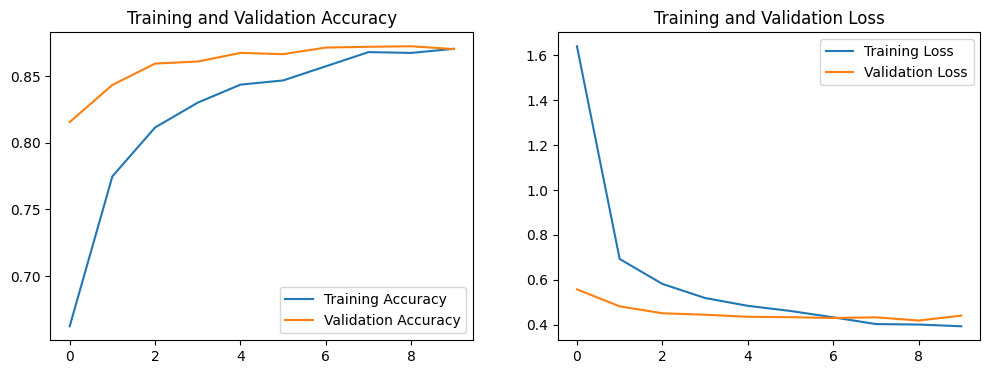

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


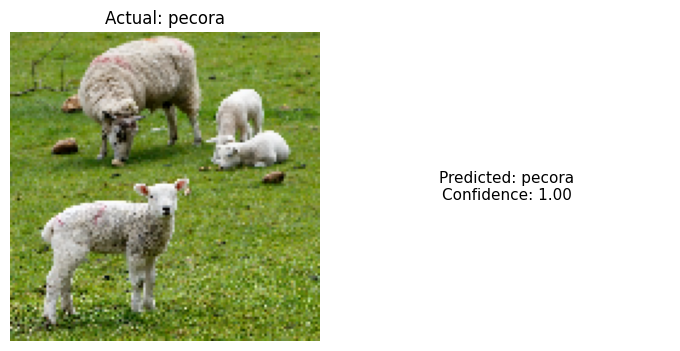

Sample 1: Actual: pecora, Predicted: pecora, Confidence: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


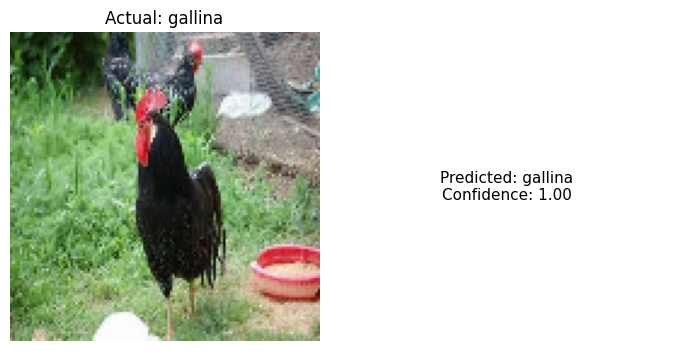

Sample 2: Actual: gallina, Predicted: gallina, Confidence: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


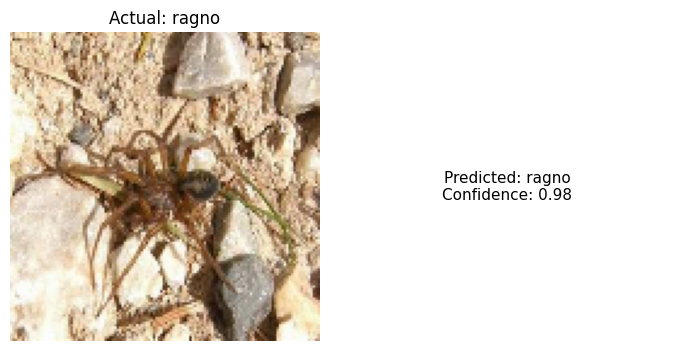

Sample 3: Actual: ragno, Predicted: ragno, Confidence: 0.9765


In [ ]:
# Cell 4: Transfer learning with VGG16 and fine tuning
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load and Freeze Base Model ----------------------------------------------------

base_model = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                             include_top=False,
                             weights='imagenet')
base_model.trainable = False

# --- 2. Add Custom Classification Head --------------------------------------------------

inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(N_CLASSES, activation='softmax')(x)
transfer_model = models.Model(inputs, outputs)

# --- 3. Compile and Train ----------------------------------------------------------------

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history = transfer_model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

# --- 4. Fine-tuning -----------------------------------------------------------------------

# 4.1. Unfreeze some layers of the base model

base_model.trainable = True
fine_tune_at = 100  # Unfreeze layers after the 100th layer

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 4.2. Re-compile the model with a lower learning rate

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# 4.3. Continue training (fine-tuning)

total_epochs = 20  # Total number of epochs including initial training
history_fine_tune = transfer_model.fit(train_dataset,
                                        epochs=total_epochs,
                                        initial_epoch=history.epoch[-1] + 1,  # Start from where initial training left off
                                        validation_data=validation_dataset)


# --- 5. Evaluation ----------------------------------------------------------------------------------------------

val_loss, val_accuracy = transfer_model.evaluate(validation_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred_probs = transfer_model.predict(validation_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = []
for _, labels_batch in validation_dataset:
    y_true.extend(np.argmax(labels_batch.numpy(), axis=1))
y_true = np.array(y_true)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# --- 6. Plot Training History -----------------------------------------------------------------------------------

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# --- 7. Predictions for Sample Images ---

sample_batch_images, sample_batch_labels = next(iter(validation_dataset.take(1)))

for i in range(min(3, BATCH_SIZE)):
    plt.figure(figsize=(7, 3.5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_batch_images[i].numpy().astype("uint8"))
    actual_label_index = np.argmax(sample_batch_labels[i].numpy())
    actual_label_name = class_names[actual_label_index]
    plt.title(f"Actual: {actual_label_name}")
    plt.axis("off")

    img_array = tf.expand_dims(sample_batch_images[i], 0)
    predictions_single = transfer_model.predict(img_array)
    predicted_label_index = np.argmax(predictions_single[0])
    predicted_label_name = class_names[predicted_label_index]

    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f"Predicted: {predicted_label_name}\nConfidence: {np.max(predictions_single[0]):.2f}",
             horizontalalignment='center', verticalalignment='center', fontsize=11)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print(f"Sample {i+1}: Actual: {actual_label_name}, Predicted: {predicted_label_name}, Confidence: {np.max(predictions_single[0]):.4f}")